<center> <img src="https://media.socastsrm.com/wordpress/wp-content/blogs.dir/343/files/2016/09/FCCNEW.jpg" alt="FCC" class="bg-primary" width="300px" height="200px"> </center>

### <center> Author: Faiza Siddiqui </center>
### <center> 18-02-2021</center>
#### <center> Project provided by Farm Credit Canada, Data Science and Risk Modelling department </center>

## Introduction 

"Farm Credit Canada is Canada's largest agricultural term lender. This organization's purpose is to enhance rural Canada by providing specialized and personalized financial services to farming operations, including family farms. Although once exclusively a farm lender, FCC is now also organized to provide funding to enterprises that are closely related or dependent on farming." 

--"Farm Credit Canada https://en.wikipedia.org/wiki/Farm_Credit_Canada"

### Installing Libraries & Importing Packages

In [1]:
'''Importing Data Manipulation Modules'''
import numpy as np                 # For mathematical calculations 
import pandas as pd                # For data preprocessing, reading/writing CSV files

'''Seaborn and Matplotlib Visualization'''
import matplotlib                  # for graph plots
import matplotlib.pyplot as plt      
import seaborn as sns              # for data Visualization
            
%matplotlib inline
'''Plotly Visualizations'''
import matplotlib as plotly      # for Interactive Graphing Library
from matplotlib import cm        # for colormaps in matplotlib 
from plotly.offline import plot  # for creating graphs that can be saved in computer & viewed in html     

'''Machine Learning'''
import sklearn
from sklearn import preprocessing   # for data understanding and data preprocessing
from sklearn import metrics         # for evaluation prediction results
from sklearn.metrics import r2_score, mean_squared_error    # for prediction & evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder    # for encoding categorical columns
from sklearn.model_selection import train_test_split              # for training the data
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge   # for Linear Regression, L1,L2
from sklearn.model_selection import cross_val_score # for cross validation 

'''For Runtime Warnings''' 
import warnings
from pandas.core.common import SettingWithCopyWarning    # for warnings while copying datasets & columns
warnings.filterwarnings("ignore", category=RuntimeWarning)  # to avoid runtime warnings
# I was getting divide by zero error so I added this

## Loading the Data

We just have one dataset for training our model, that is Development dataset. It is a CSV file. So we will read/load the CSV file to work with this dataset

In [2]:
'''Read FCC Data from csv file'''
df_train = pd.read_csv(r'C:\FAIZA\DATA SCIENCE\Assignment\Development Dataset - With Actuals.csv')
FCC_train = df_train.copy()

In [3]:
FCC_train.head()

,Instrument,Instrument Type,Instrument Subtype,Counterparty Alias,MTM Exposure,Book Exposure,1-Year Likelihood,Severity Used,Industry Alias,Commitment,Country of Incorporation,Maturity Date,Time to Maturity,Capital - EL Tail Risk Contribution (Capped),Capitalization Rate - EL Tail Risk Contribution,Asset Recovery Correlation,Recovery R-Squared for Simulation,Asset R-Squared for Simulation
0,86540,Loan,Term Loan Amortizing,C23099,224013.330,224013.33,0.160200,0.057,IND1,224013.33,CAN,12/15/2037,16.375086,57797.73,0.258010,0.26706,0.34109,0.0976
1,86099,Loan,Revolver,C43055,135000.000,135000.00,0.036900,0.817,IND1,135000.00,CAN,04/18/2022,0.714579,23359.48,0.173033,0.26706,0.34109,0.1077
2,5738,Loan,Term Loan Amortizing,C11421,36190.953,36190.95,0.036900,0.019,IND2,36190.95,CAN,11/17/2031,10.297057,1558.02,0.043050,0.33000,0.34000,0.0469
3,165996,Loan,Term Loan Amortizing,C44251,84600.000,84600.00,0.006525,0.019,IND1,84600.00,CAN,04/03/2028,6.674880,703.86,0.008320,0.26706,0.34109,0.1077
4,118169,Loan,Term Loan Amortizing,C53713,37508.787,37508.78,0.020475,0.247,IND1,37508.78,CAN,01/03/2040,18.425736,3602.36,0.096041,0.33000,0.34000,0.0495


In [4]:
FCC_train.tail()

,Instrument,Instrument Type,Instrument Subtype,Counterparty Alias,MTM Exposure,Book Exposure,1-Year Likelihood,Severity Used,Industry Alias,Commitment,Country of Incorporation,Maturity Date,Time to Maturity,Capital - EL Tail Risk Contribution (Capped),Capitalization Rate - EL Tail Risk Contribution,Asset Recovery Correlation,Recovery R-Squared for Simulation,Asset R-Squared for Simulation
151527,126599,Loan,Term Loan Amortizing,C9779,260814.096,260814.09,0.112725,0.0095,IND1,260814.09,CAN,05/01/2040,18.751540,20564.36,0.078847,0.26706,0.34109,0.1347
151528,165919,Loan,Revolver,C23546,45000.000,45000.00,0.006525,0.8170,IND1,45000.00,CAN,05/01/2023,1.749487,4657.72,0.103505,0.26706,0.34109,0.1077
151529,18381,Loan,Term Loan Amortizing,C24812,182174.661,182174.66,0.020700,0.0095,IND1,182174.66,CAN,05/01/2030,8.750171,3428.36,0.018819,0.26706,0.34109,0.1235
151530,116229,Loan,Term Loan Amortizing,C34960,1179864.819,1179864.81,0.014400,0.0095,IND1,1179864.81,CAN,10/25/2039,18.234086,26063.25,0.022090,0.26706,0.34109,0.0769
151531,164164,Loan,Term Loan Amortizing,C28476,43200.000,43200.00,0.112725,0.0095,IND1,43200.00,CAN,07/17/2028,6.962355,1900.74,0.043999,0.26706,0.34109,0.1347


## Understanding our Data

###### Check columns of dataframe

In [5]:
FCC_train.columns

Index(['Instrument', 'Instrument Type', 'Instrument Subtype',
       'Counterparty Alias', 'MTM Exposure', 'Book Exposure',
       '1-Year Likelihood', 'Severity Used', 'Industry Alias', 'Commitment',
       'Country of Incorporation', 'Maturity Date', 'Time to Maturity',
       'Capital - EL Tail Risk Contribution (Capped)',
       'Capitalization Rate - EL Tail Risk Contribution',
       'Asset Recovery Correlation', 'Recovery R-Squared for Simulation',
       'Asset R-Squared for Simulation'],
      dtype='object')

###### Check the statistics

In [6]:
FCC_train.describe()

,Instrument,MTM Exposure,Book Exposure,1-Year Likelihood,Severity Used,Commitment,Time to Maturity,Capital - EL Tail Risk Contribution (Capped),Capitalization Rate - EL Tail Risk Contribution,Asset Recovery Correlation,Recovery R-Squared for Simulation,Asset R-Squared for Simulation
count,151532.000000,1.515320e+05,1.515320e+05,151532.000000,151532.000000,1.515320e+05,151532.000000,1.515320e+05,151532.000000,151532.000000,151532.000000,151532.000000
mean,83299.863382,2.751994e+05,2.661031e+05,0.061460,0.081395,2.756334e+05,7.166776,1.628697e+04,0.056623,0.275837,0.340772,0.082499
std,48078.750392,1.530886e+06,1.495449e+06,0.129754,0.180296,1.531410e+06,7.423330,1.657304e+05,0.134575,0.022782,0.009948,0.026737
min,1.000000,6.300000e-02,6.000000e-02,0.000225,0.009500,6.000000e-02,0.002738,-1.663000e+01,-0.000123,0.192410,0.154790,0.040000
25%,41641.750000,3.151405e+04,2.956708e+04,0.014400,0.009500,3.158485e+04,1.336071,4.247775e+02,0.008701,0.267060,0.341090,0.054900
50%,83361.500000,9.000000e+04,8.422523e+04,0.020700,0.019000,9.000000e+04,4.002738,2.395550e+03,0.028426,0.267060,0.341090,0.086000
75%,124934.250000,2.305225e+05,2.250000e+05,0.062550,0.057000,2.307162e+05,11.835729,8.969438e+03,0.060078,0.267060,0.341090,0.107700
max,166532.000000,2.475000e+08,2.475000e+08,1.000000,0.817000,2.475000e+08,79.427789,3.345287e+07,2.834707,0.592470,0.642590,0.650000


In [7]:
print(FCC_train.describe(include=['number']).loc[['min','max','mean']].T.sort_values('max'))

                                                       min           max  \
Asset Recovery Correlation                        0.192410  5.924700e-01   
Recovery R-Squared for Simulation                 0.154790  6.425900e-01   
Asset R-Squared for Simulation                    0.040000  6.500000e-01   
Severity Used                                     0.009500  8.170000e-01   
1-Year Likelihood                                 0.000225  1.000000e+00   
Capitalization Rate - EL Tail Risk Contribution  -0.000123  2.834707e+00   
Time to Maturity                                  0.002738  7.942779e+01   
Instrument                                        1.000000  1.665320e+05   
Capital - EL Tail Risk Contribution (Capped)    -16.630000  3.345287e+07   
MTM Exposure                                      0.063000  2.475000e+08   
Book Exposure                                     0.060000  2.475000e+08   
Commitment                                        0.060000  2.475000e+08   

           

###### Finding: We observe that there are some negative values as well. And the range of data in all columns is very different from each other. Data needs to be standardized. We will do it in later steps. 

##### Check for column datatypes

In [8]:
FCC_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151532 entries, 0 to 151531
Data columns (total 18 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   Instrument                                       151532 non-null  int64  
 1   Instrument Type                                  151532 non-null  object 
 2   Instrument Subtype                               151500 non-null  object 
 3   Counterparty Alias                               151532 non-null  object 
 4   MTM Exposure                                     151532 non-null  float64
 5   Book Exposure                                    151532 non-null  float64
 6   1-Year Likelihood                                151532 non-null  float64
 7   Severity Used                                    151532 non-null  float64
 8   Industry Alias                                   151532 non-null  object 
 9   Commitment     

##### Finding: We observe that there are some object data types, we will deal with them later

##### Check for null values

In [9]:
FCC_train.isnull().sum().sort_values(ascending=False)

Instrument Subtype                                 32
Instrument                                          0
Country of Incorporation                            0
Recovery R-Squared for Simulation                   0
Asset Recovery Correlation                          0
Capitalization Rate - EL Tail Risk Contribution     0
Capital - EL Tail Risk Contribution (Capped)        0
Time to Maturity                                    0
Maturity Date                                       0
Commitment                                          0
Instrument Type                                     0
Industry Alias                                      0
Severity Used                                       0
1-Year Likelihood                                   0
Book Exposure                                       0
MTM Exposure                                        0
Counterparty Alias                                  0
Asset R-Squared for Simulation                      0
dtype: int64

###### Finding: Instrument Subtype contains some null values.

In [10]:
FCC_train["Instrument Type"].value_counts()

Loan    151500
Bond        32
Name: Instrument Type, dtype: int64

##### There are 32 null values in FCC Dataset. After studying the data, we understood that all the rows with bond data in Instrument Subtype column are null. So we can fill the null subtype values in with 'Bond'.

In [11]:
FCC_null_filled = FCC_train.fillna('Bond')

Now no more nulls are left in the data

In [12]:
FCC_null_filled.isnull().sum()

Instrument                                         0
Instrument Type                                    0
Instrument Subtype                                 0
Counterparty Alias                                 0
MTM Exposure                                       0
Book Exposure                                      0
1-Year Likelihood                                  0
Severity Used                                      0
Industry Alias                                     0
Commitment                                         0
Country of Incorporation                           0
Maturity Date                                      0
Time to Maturity                                   0
Capital - EL Tail Risk Contribution (Capped)       0
Capitalization Rate - EL Tail Risk Contribution    0
Asset Recovery Correlation                         0
Recovery R-Squared for Simulation                  0
Asset R-Squared for Simulation                     0
dtype: int64

Get a series of unique values in column 'Instrument Subtype' of the dataframe

In [13]:
unique_values = FCC_null_filled['Instrument Subtype'].unique()
print('Unique elements in column "Instrument Subtype" ')
print(unique_values)

Unique elements in column "Instrument Subtype" 
['Term Loan Amortizing' 'Revolver' 'Bond']


###### Dataframe length and shape

In [14]:
FCC_null_filled.shape

(151532, 18)

Our dataset contains 151532 rows & 18 columns.

###### Get unique count for each variable

In [15]:
FCC_null_filled.nunique()

Instrument                                         151532
Instrument Type                                         2
Instrument Subtype                                      3
Counterparty Alias                                  56917
MTM Exposure                                        98763
Book Exposure                                       99516
1-Year Likelihood                                      25
Severity Used                                          11
Industry Alias                                         40
Commitment                                          97589
Country of Incorporation                                1
Maturity Date                                        4562
Time to Maturity                                     4562
Capital - EL Tail Risk Contribution (Capped)       130715
Capitalization Rate - EL Tail Risk Contribution    151315
Asset Recovery Correlation                            987
Recovery R-Squared for Simulation                     994
Asset R-Square

###### Finding: Since "Country of Incorporation" is same for all (only 1 unique value), therefore, we can drop that column.             
###### Also, we will drop "Maturity Date" column since it has the same number of unique values as "Time to Maturity". They are both representing the same information. So removing Maturity Date column does not make any difference on our output.
##### We can also drop "Instrument" since it is a unique identifier for every column and does not make any difference on the target variable. 

## Transformation & Cleaning

#### Log Transformation of Monetary Amounts

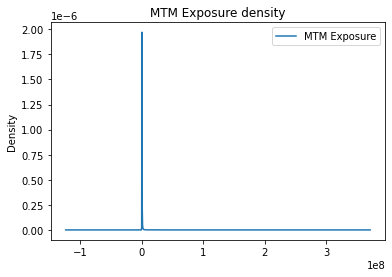

In [16]:
FCC_null_filled[["MTM Exposure"]].plot.kde()
plt.title("MTM Exposure density")
plt.show()

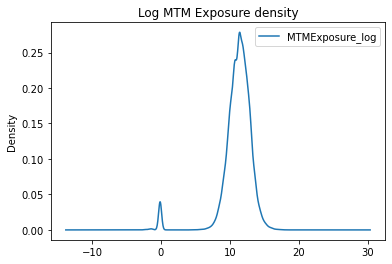

In [17]:
FCC_null_filled['MTMExposure_log']=np.log(FCC_null_filled['MTM Exposure'])
FCC_null_filled[["MTMExposure_log"]][np.isfinite(FCC_null_filled.MTMExposure_log)].plot.kde()
plt.title("Log MTM Exposure density")
plt.show()

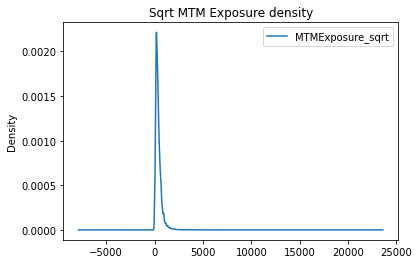

In [18]:
FCC_null_filled['MTMExposure_sqrt']=np.sqrt(FCC_null_filled['MTM Exposure'])
FCC_null_filled[["MTMExposure_sqrt"]][np.isfinite(FCC_null_filled.MTMExposure_sqrt)].plot.kde()
plt.title("Sqrt MTM Exposure density")
plt.show()

##### Finding: We can see that log transformations are giving a better distribution than square root or the original values, so we will do the same on all the other monetary columns

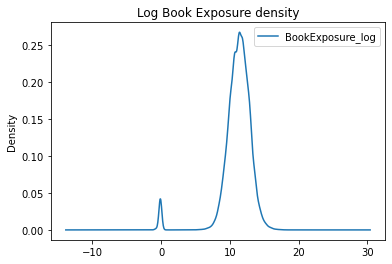

In [19]:
FCC_null_filled['BookExposure_log']=np.log(FCC_null_filled['Book Exposure'])

# Drop Book Exposure column from data
FCC_null_filled.drop(['Book Exposure'], axis=1, inplace=True)
FCC_null_filled[["BookExposure_log"]][np.isfinite(FCC_null_filled.BookExposure_log)].plot.kde()
plt.title("Log Book Exposure density")
plt.show()

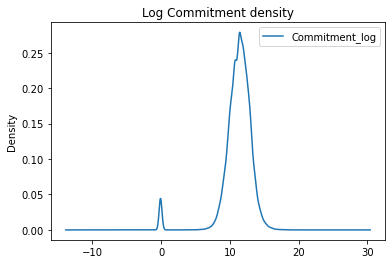

In [20]:
FCC_null_filled['Commitment_log']=np.log(FCC_null_filled['Commitment'])
FCC_null_filled[["Commitment_log"]][np.isfinite(FCC_null_filled.Commitment_log)].plot.kde()
plt.title("Log Commitment density")
plt.show()

##### Convert Capital to Log since it is a monetary amount

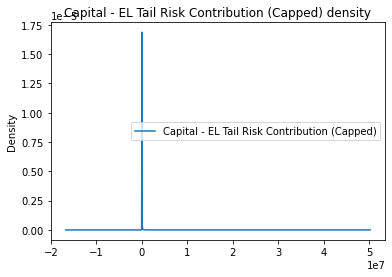

In [21]:
FCC_null_filled[["Capital - EL Tail Risk Contribution (Capped)"]].plot.kde()
plt.title("Capital - EL Tail Risk Contribution (Capped) density")
plt.show()

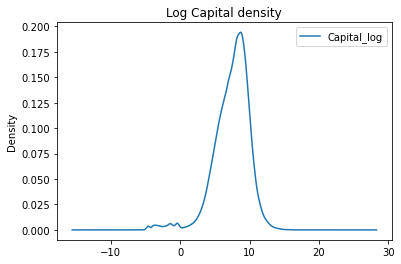

In [22]:
FCC_null_filled['Capital_log']=np.log(FCC_null_filled['Capital - EL Tail Risk Contribution (Capped)'])
FCC_null_filled[['Capital_log']][np.isfinite(FCC_null_filled.Capital_log)].plot.kde()
plt.title("Log Capital density")
plt.show()

#### Correlation plot

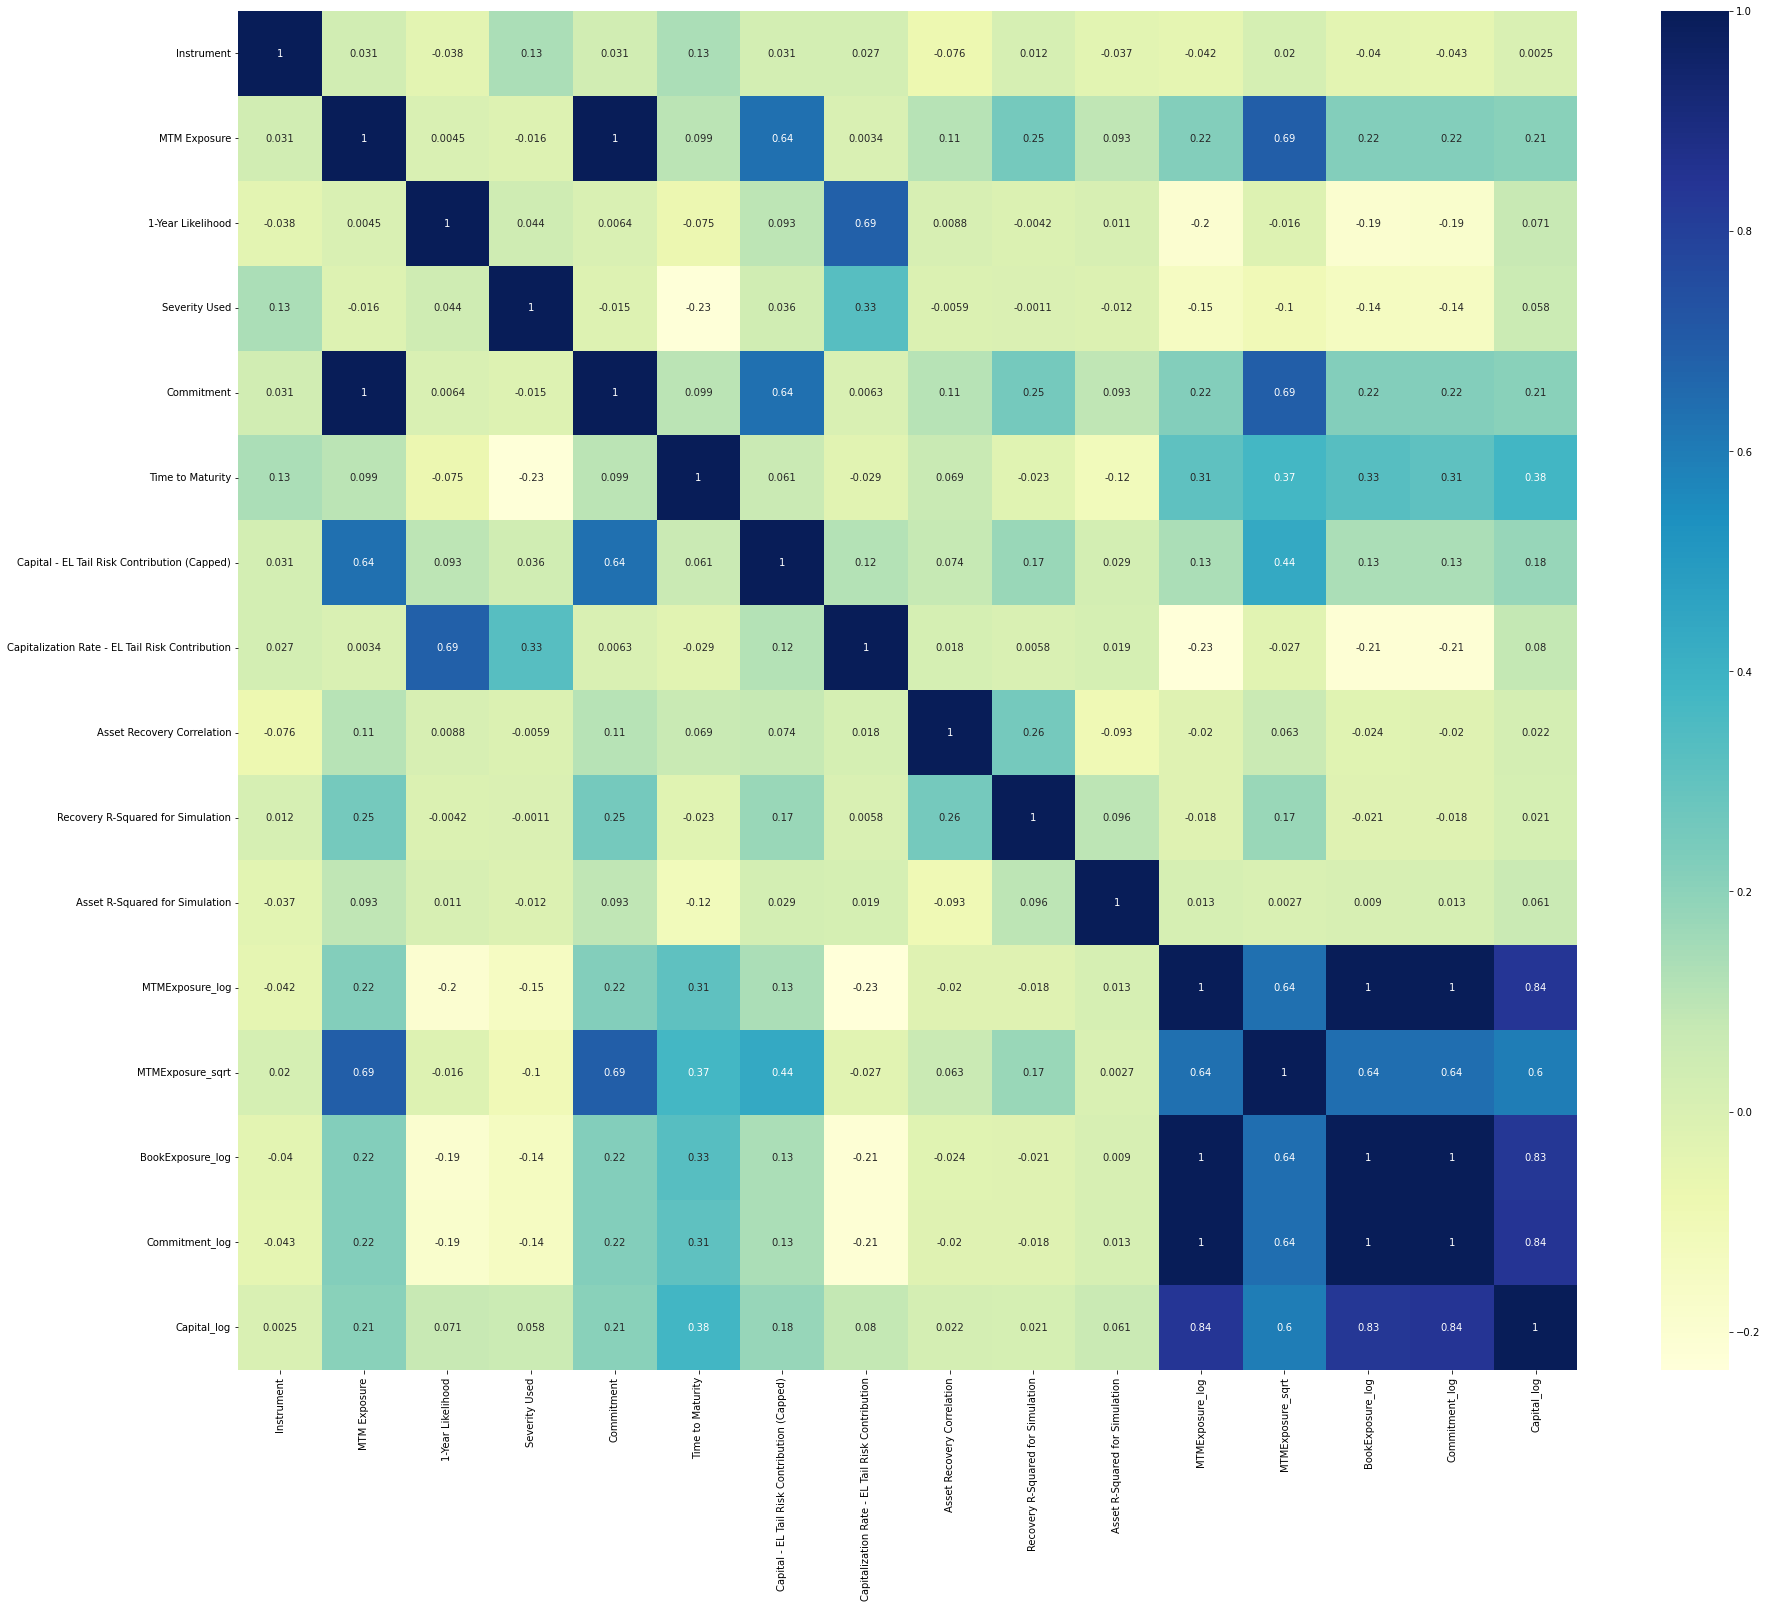

In [23]:
# plotting a heat map
plt.figure(figsize = (30, 25))
sns.heatmap(FCC_null_filled.corr(), annot = True, cmap="YlGnBu") # annot = True because I need values on every cell
plt.show()

##### Finding: Since MTM Exposure, Book Exposure & Commitment are very highly correlated. We  drop any two of those columns and keep only one due to Multicollinearity problem. I have decided to drop "BookExposure_Log" & "Commitment_Log" since MTM_Exposure will be used in calculating the final Capitalization  Rate.

### Categorical Data

In [24]:
categorical_columns = FCC_null_filled.select_dtypes(exclude=[np.number])
categorical_columns.describe()

,Instrument Type,Instrument Subtype,Counterparty Alias,Industry Alias,Country of Incorporation,Maturity Date
count,151532,151532,151532,151532,151532,151532
unique,2,3,56917,40,1,4562
top,Loan,Term Loan Amortizing,C12626,IND1,CAN,03/15/2022
freq,151500,105500,40,143393,151532,16592


C:\Users\faiza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Instrument Type', ylabel='count'>

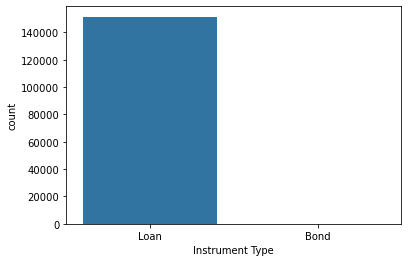

In [25]:
sns.countplot('Instrument Type', data=FCC_null_filled)

C:\Users\faiza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Instrument Subtype', ylabel='count'>

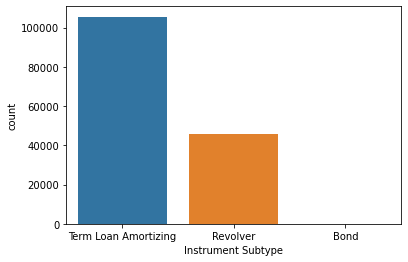

In [26]:
sns.countplot('Instrument Subtype', data=FCC_null_filled)

##### Finding: Counterparty Alias can be removed since it also an identfier and has very less correlation with the target variable.

### Encode categorical columns

###### Dummy Encoding & Label Encoding

In [27]:
dummy_encoded_df = pd.get_dummies(FCC_null_filled, columns = ['Instrument Type', 'Instrument Subtype'], drop_first = True)

label = LabelEncoder()
dummy_encoded_df['Industry Alias'] = label.fit_transform(dummy_encoded_df['Industry Alias'])

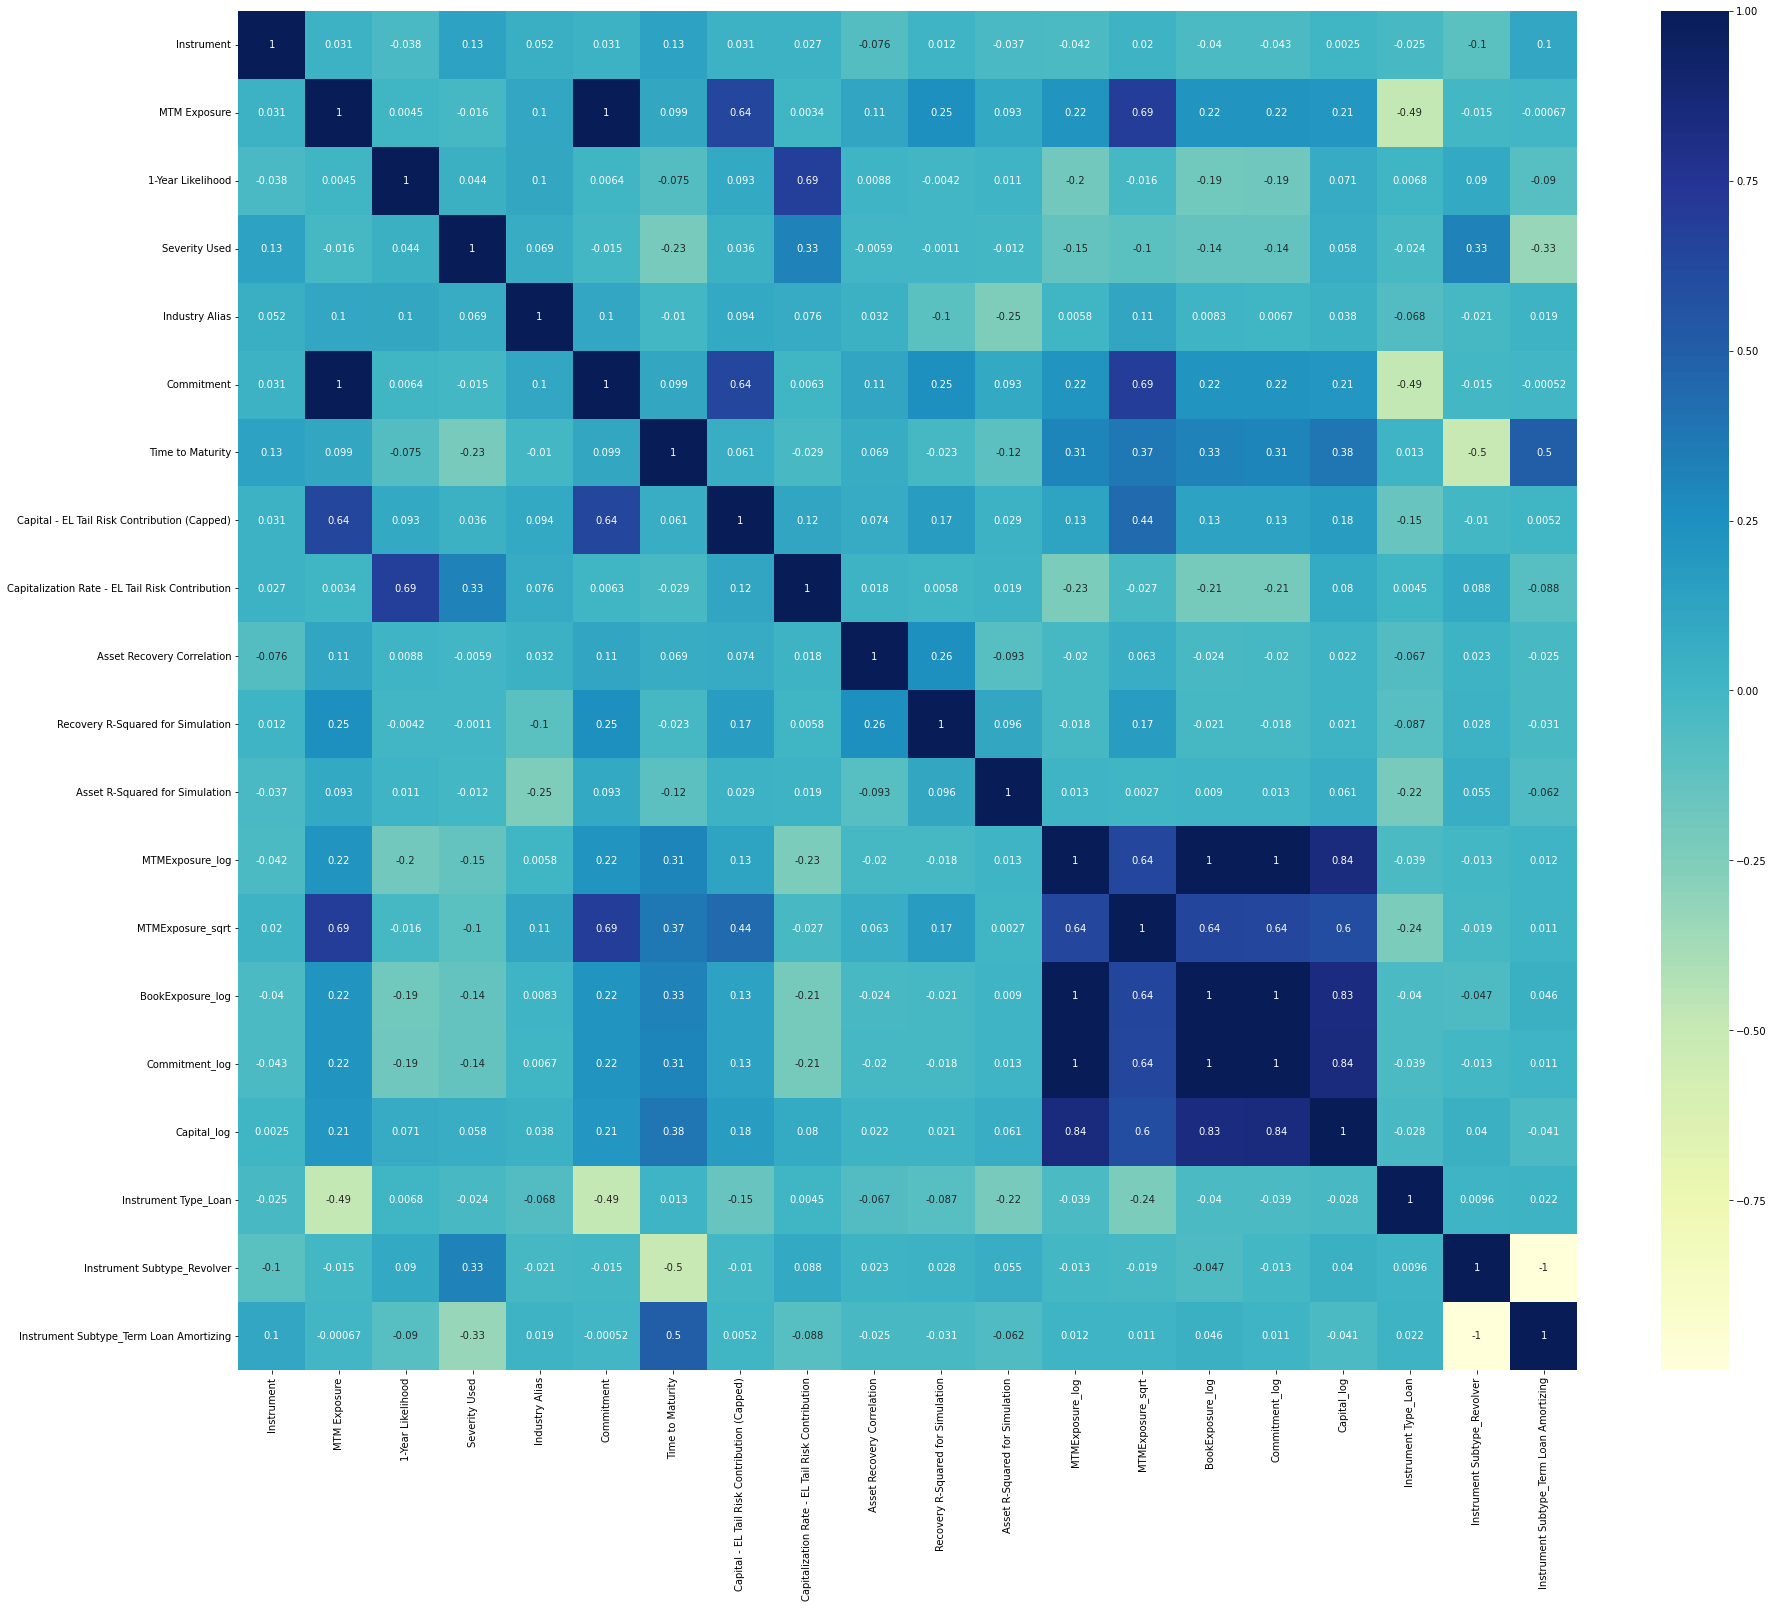

In [28]:
plt.figure(figsize = (30, 25))
sns.heatmap(dummy_encoded_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

###### Finding:  Instrument Subtype_Revolver & Instrument Subtype_Term Loan Amortizing columns are highly negatively correlated. Also Industry Alias is not correlated to MTM Exposure, Capitalization rate and Capital log (approximately zero), therefore we can drop that column. Let's drop one among them.

### Handling Outliers

In [29]:
dummy_encoded_df.isnull().sum().sort_values(ascending=False)

Capital_log                                        86
Instrument                                          0
Asset Recovery Correlation                          0
Instrument Subtype_Revolver                         0
Instrument Type_Loan                                0
Commitment_log                                      0
BookExposure_log                                    0
MTMExposure_sqrt                                    0
MTMExposure_log                                     0
Asset R-Squared for Simulation                      0
Recovery R-Squared for Simulation                   0
Capitalization Rate - EL Tail Risk Contribution     0
Counterparty Alias                                  0
Capital - EL Tail Risk Contribution (Capped)        0
Time to Maturity                                    0
Maturity Date                                       0
Country of Incorporation                            0
Commitment                                          0
Industry Alias              

##### Finding: There are 86 null values in Capital_log

##### Drop null values

In [30]:
dummy_encoded_df.dropna(axis='rows', inplace = True)

In [31]:
dummy_encoded_df.head()

,Instrument,Counterparty Alias,MTM Exposure,1-Year Likelihood,Severity Used,Industry Alias,Commitment,Country of Incorporation,Maturity Date,Time to Maturity,...,Recovery R-Squared for Simulation,Asset R-Squared for Simulation,MTMExposure_log,MTMExposure_sqrt,BookExposure_log,Commitment_log,Capital_log,Instrument Type_Loan,Instrument Subtype_Revolver,Instrument Subtype_Term Loan Amortizing
0,86540,C23099,224013.330,0.160200,0.057,0,224013.33,CAN,12/15/2037,16.375086,...,0.34109,0.0976,12.319461,473.300465,12.319461,12.319461,10.964705,1,0,1
1,86099,C43055,135000.000,0.036900,0.817,0,135000.00,CAN,04/18/2022,0.714579,...,0.34109,0.1077,11.813030,367.423461,11.813030,11.813030,10.058758,1,1,0
2,5738,C11421,36190.953,0.036900,0.019,11,36190.95,CAN,11/17/2031,10.297057,...,0.34000,0.0469,10.496564,190.239199,10.496564,10.496564,7.351171,1,0,1
3,165996,C44251,84600.000,0.006525,0.019,0,84600.00,CAN,04/03/2028,6.674880,...,0.34109,0.1077,11.345690,290.860791,11.345690,11.345690,6.556579,1,0,1
4,118169,C53713,37508.787,0.020475,0.247,0,37508.78,CAN,01/03/2040,18.425736,...,0.34000,0.0495,10.532331,193.671854,10.532330,10.532330,8.189344,1,0,1


###### Filter rows with Capital_log greater than 0

In [32]:
dummy_encoded_df = dummy_encoded_df[dummy_encoded_df['Capital_log'] >=0 ].reset_index(drop=True)
dummy_encoded_df.head()

,Instrument,Counterparty Alias,MTM Exposure,1-Year Likelihood,Severity Used,Industry Alias,Commitment,Country of Incorporation,Maturity Date,Time to Maturity,...,Recovery R-Squared for Simulation,Asset R-Squared for Simulation,MTMExposure_log,MTMExposure_sqrt,BookExposure_log,Commitment_log,Capital_log,Instrument Type_Loan,Instrument Subtype_Revolver,Instrument Subtype_Term Loan Amortizing
0,86540,C23099,224013.330,0.160200,0.057,0,224013.33,CAN,12/15/2037,16.375086,...,0.34109,0.0976,12.319461,473.300465,12.319461,12.319461,10.964705,1,0,1
1,86099,C43055,135000.000,0.036900,0.817,0,135000.00,CAN,04/18/2022,0.714579,...,0.34109,0.1077,11.813030,367.423461,11.813030,11.813030,10.058758,1,1,0
2,5738,C11421,36190.953,0.036900,0.019,11,36190.95,CAN,11/17/2031,10.297057,...,0.34000,0.0469,10.496564,190.239199,10.496564,10.496564,7.351171,1,0,1
3,165996,C44251,84600.000,0.006525,0.019,0,84600.00,CAN,04/03/2028,6.674880,...,0.34109,0.1077,11.345690,290.860791,11.345690,11.345690,6.556579,1,0,1
4,118169,C53713,37508.787,0.020475,0.247,0,37508.78,CAN,01/03/2040,18.425736,...,0.34000,0.0495,10.532331,193.671854,10.532330,10.532330,8.189344,1,0,1


## Exploratory Data Analysis

Here our main interest is to get an understanding as to how the given attributes relate to 'Capital - EL Tail Risk Contribution (Capped)' 

'Capitalization Rate - EL Tail Risk Contribution' can be calculated by the formula: 
##### <center> Capitalization Rate = Capital / MTM Exposure </center>
Therefore, here we have only one target variable

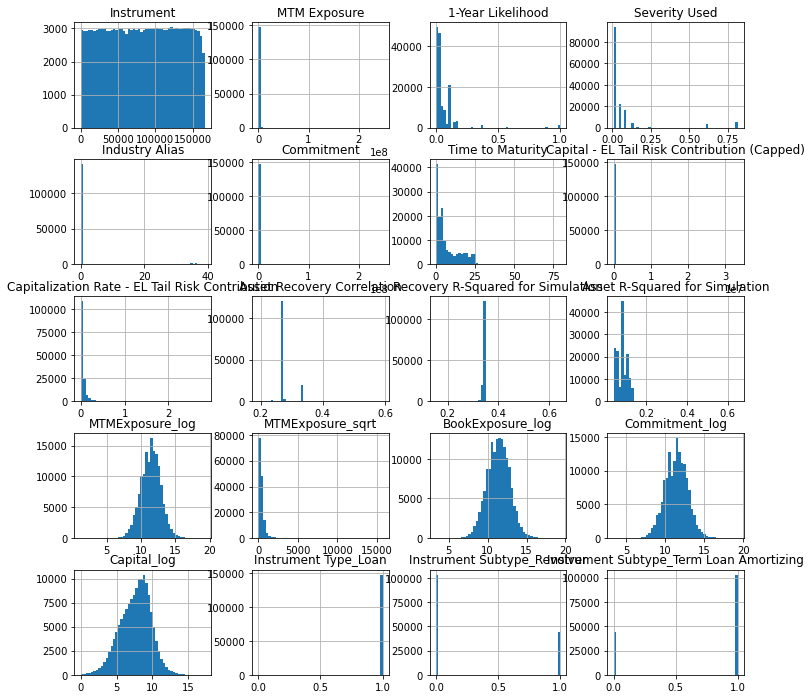

In [33]:
final_Df = dummy_encoded_df
final_Df.hist(bins=50, figsize = (12,12))
plt.show()

In [34]:
final_Df.columns

Index(['Instrument', 'Counterparty Alias', 'MTM Exposure', '1-Year Likelihood',
       'Severity Used', 'Industry Alias', 'Commitment',
       'Country of Incorporation', 'Maturity Date', 'Time to Maturity',
       'Capital - EL Tail Risk Contribution (Capped)',
       'Capitalization Rate - EL Tail Risk Contribution',
       'Asset Recovery Correlation', 'Recovery R-Squared for Simulation',
       'Asset R-Squared for Simulation', 'MTMExposure_log', 'MTMExposure_sqrt',
       'BookExposure_log', 'Commitment_log', 'Capital_log',
       'Instrument Type_Loan', 'Instrument Subtype_Revolver',
       'Instrument Subtype_Term Loan Amortizing'],
      dtype='object')

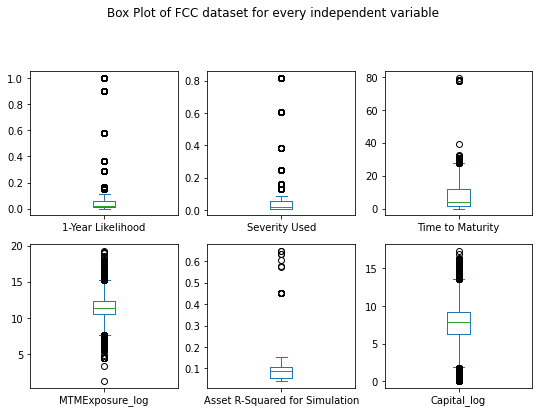

In [35]:
final_Df[['1-Year Likelihood', 'Severity Used', 'Time to Maturity', 'MTMExposure_log', 'Capitalization Rate - EL Tail Risk Contribution','Asset R-Squared for Simulation','Capital_log']].drop('Capitalization Rate - EL Tail Risk Contribution', axis=1).plot(kind='box', subplots=True, layout=(3,3), sharex =False, sharey=False, figsize=(9,9), title='Box Plot of FCC dataset for every independent variable')
plt.show()

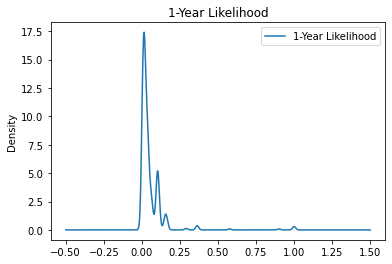

In [36]:
final_Df[["1-Year Likelihood"]].plot.kde()
plt.title("1-Year Likelihood")
plt.show()

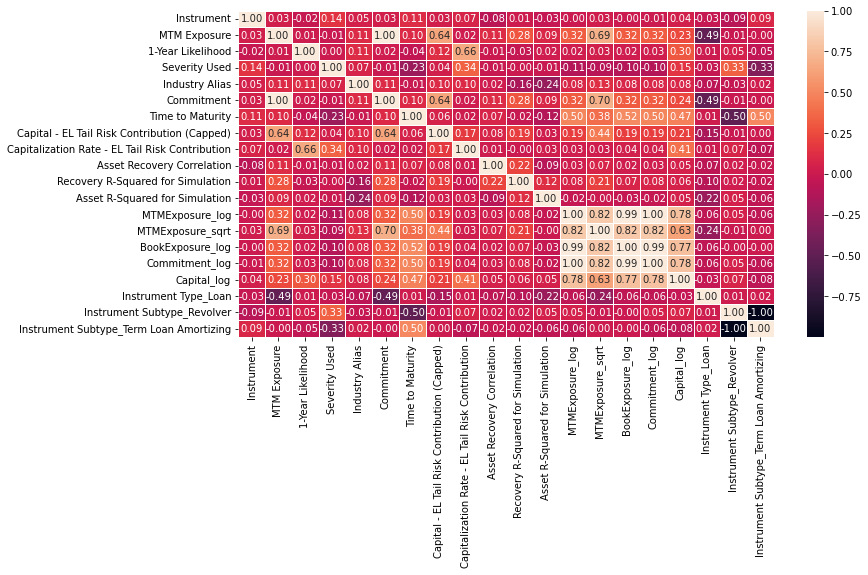

In [37]:
plt.figure(figsize=(12,6))
sns.heatmap(final_Df.corr(), annot = True, fmt = '1.2f', annot_kws = {'size' : 10}, linewidth = 1)
plt.show()

<Figure size 864x864 with 0 Axes>

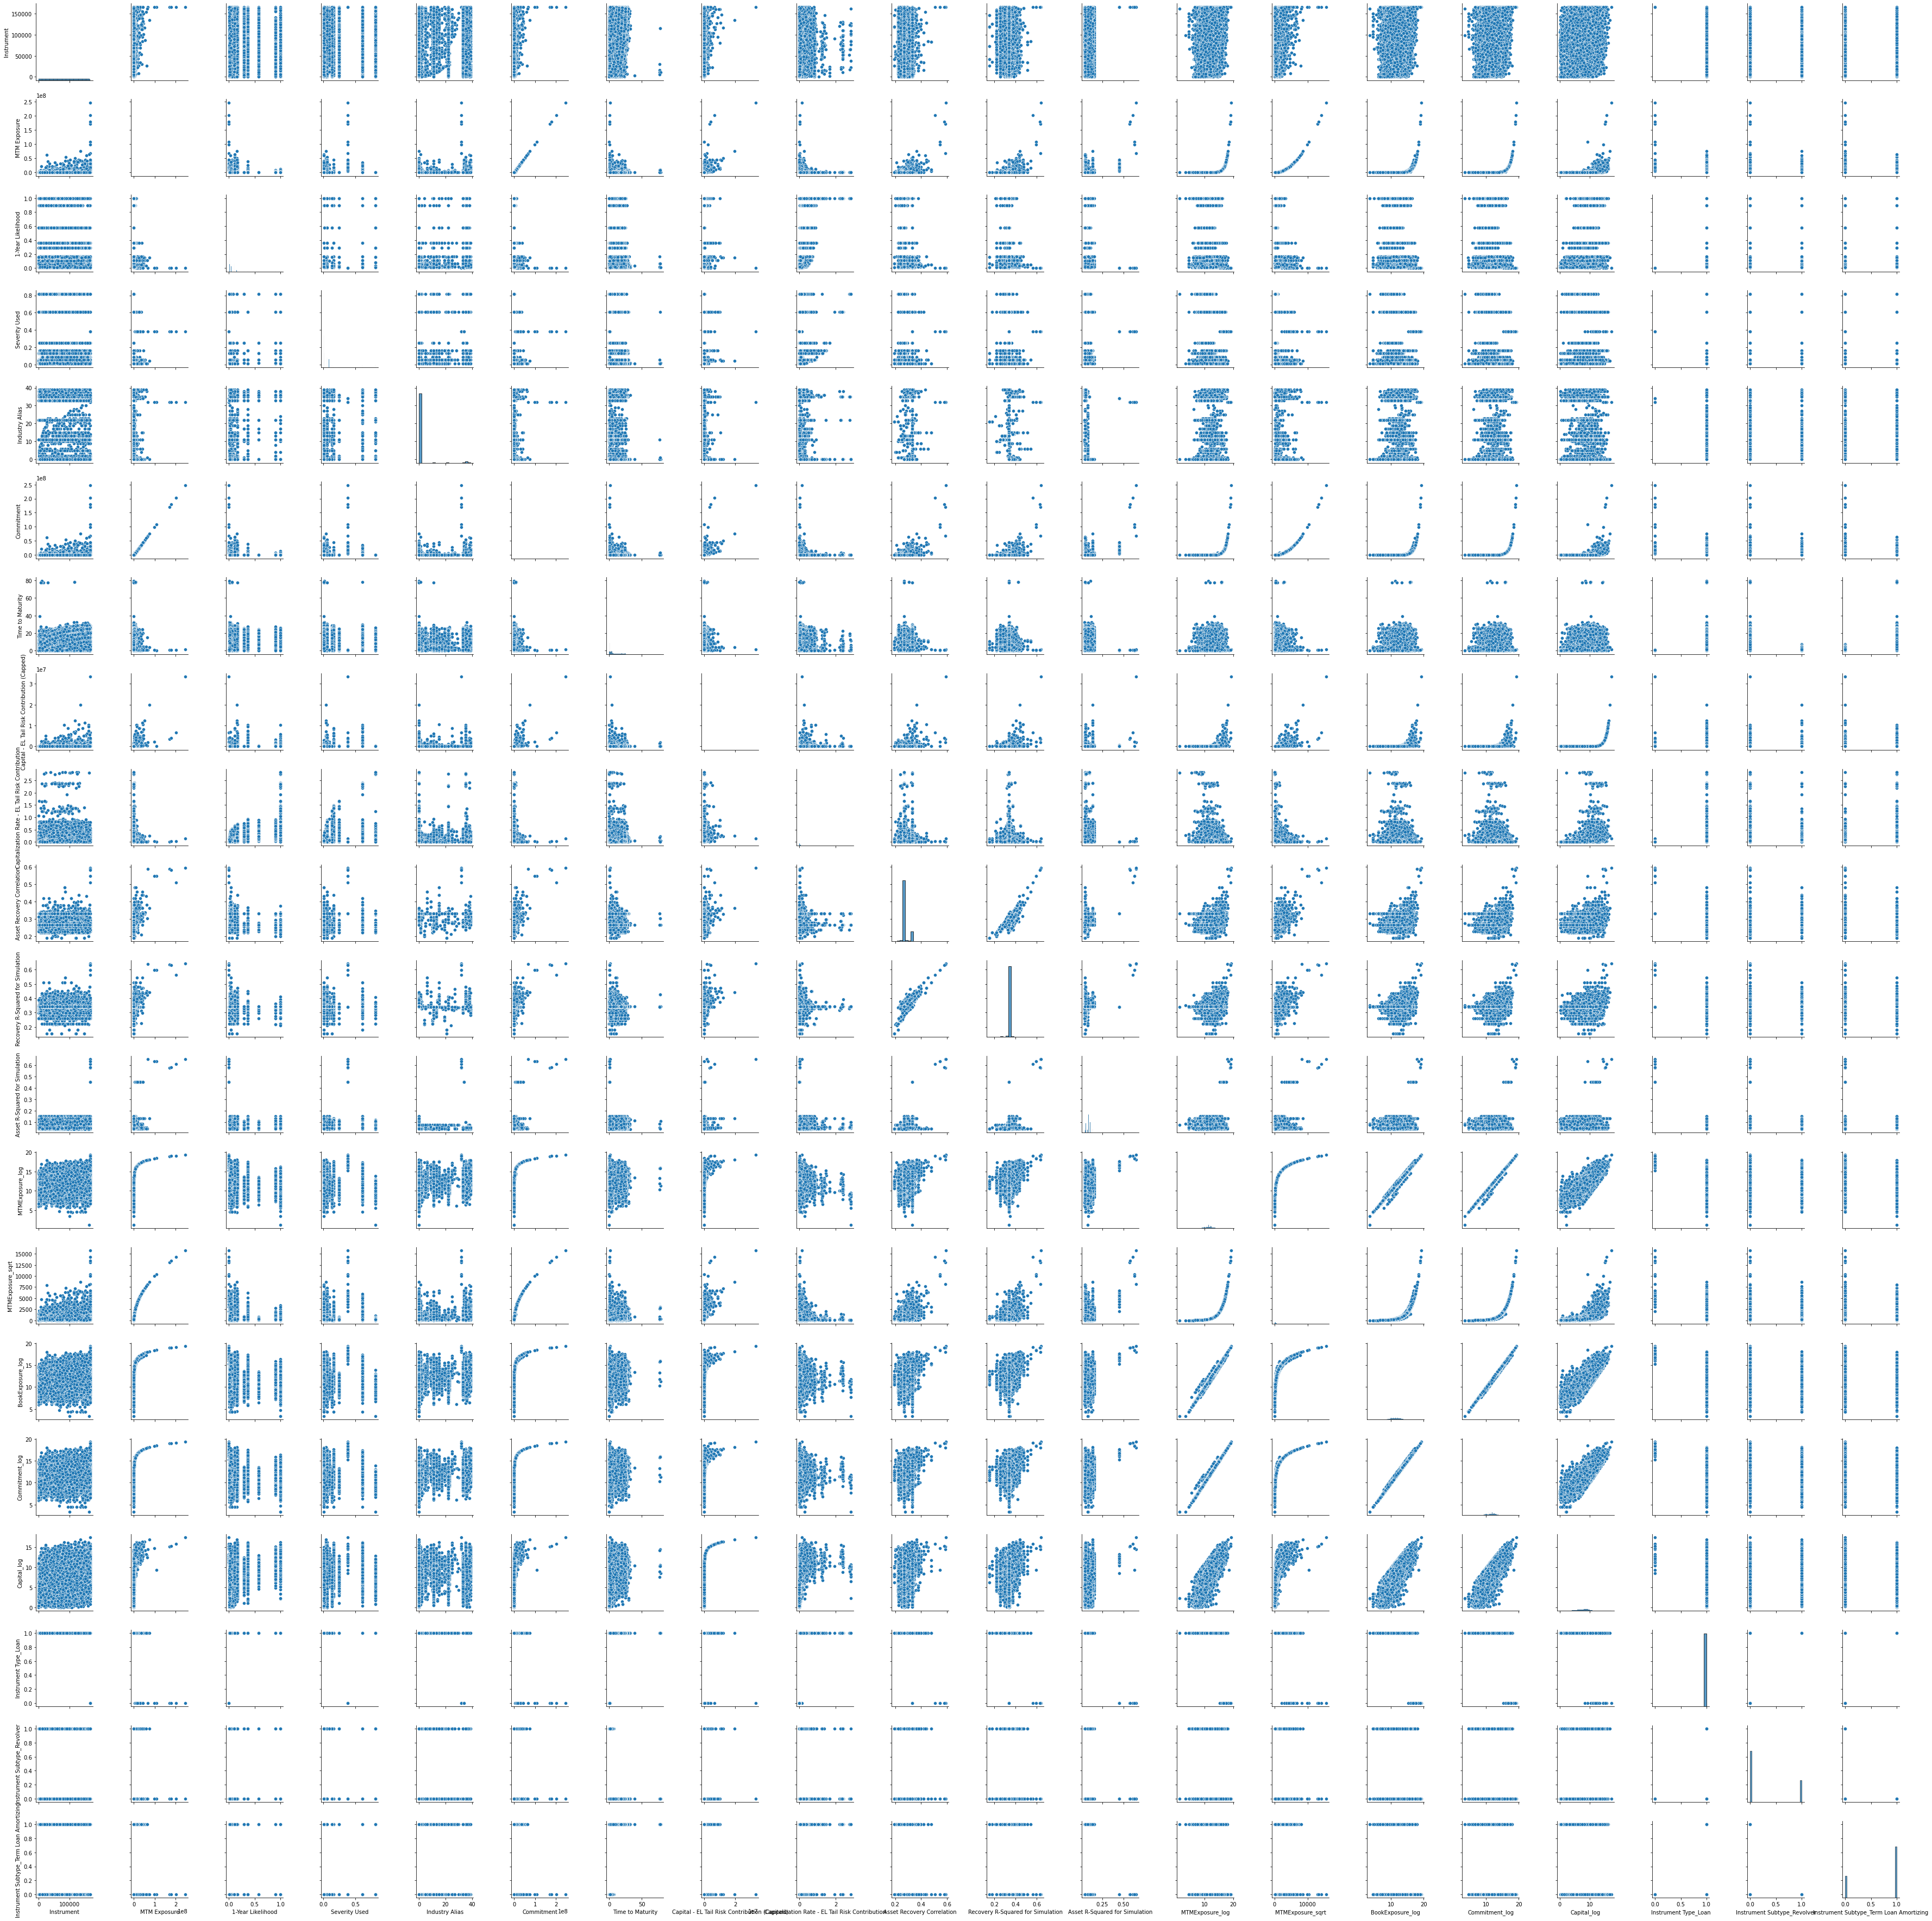

In [38]:
plt.figure(figsize=(12,12))
sns.pairplot(data=final_Df)
plt.show()

In [39]:
# Correlation of Capital_log with other features
correlation_value = final_Df.corr()

print (correlation_value['Capital_log'].sort_values(ascending=False)[:19], '\n')

Capital_log                                        1.000000
Commitment_log                                     0.782600
MTMExposure_log                                    0.780924
BookExposure_log                                   0.767810
MTMExposure_sqrt                                   0.625490
Time to Maturity                                   0.472479
Capitalization Rate - EL Tail Risk Contribution    0.405037
1-Year Likelihood                                  0.298285
Commitment                                         0.235483
MTM Exposure                                       0.234782
Capital - EL Tail Risk Contribution (Capped)       0.205780
Severity Used                                      0.148957
Industry Alias                                     0.078832
Instrument Subtype_Revolver                        0.074627
Recovery R-Squared for Simulation                  0.060551
Asset R-Squared for Simulation                     0.053828
Asset Recovery Correlation              

<AxesSubplot:xlabel='Asset Recovery Correlation', ylabel='Capital_log'>

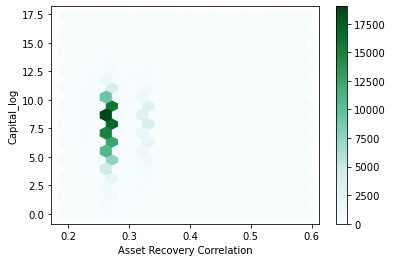

In [40]:
fig, ax = plt.subplots()
final_Df.plot.hexbin(x='Asset Recovery Correlation', y='Capital_log', gridsize=20,ax=ax)

<AxesSubplot:xlabel='Recovery R-Squared for Simulation', ylabel='Capital_log'>

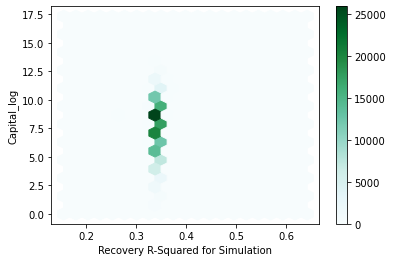

In [41]:
fig, ax = plt.subplots()
final_Df.plot.hexbin(x='Recovery R-Squared for Simulation', y='Capital_log', gridsize=20,ax=ax)

<AxesSubplot:title={'center':'Severity Used'}, ylabel='Density'>

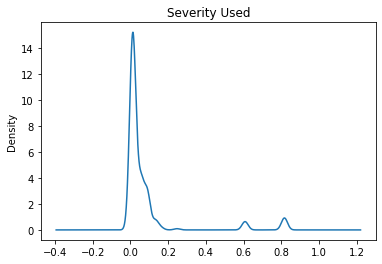

In [42]:
final_Df["Severity Used"].plot.kde(title = 'Severity Used')

<AxesSubplot:title={'center':'Asset Recovery Correlation'}, ylabel='Density'>

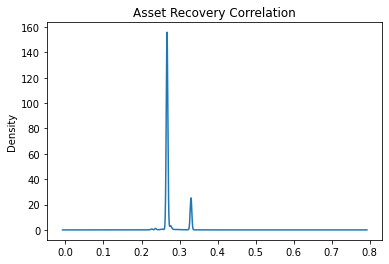

In [43]:
final_Df["Asset Recovery Correlation"].plot.kde(title='Asset Recovery Correlation' )

<AxesSubplot:title={'center':'Recovery R-Squared for Simulation using Kernel Density Estimation'}, ylabel='Density'>

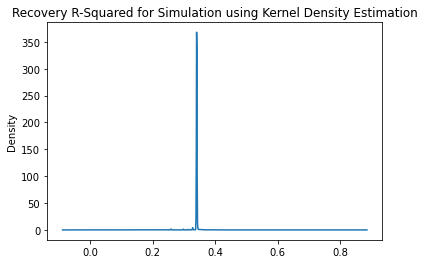

In [44]:
final_Df["Recovery R-Squared for Simulation"].plot.kde(title="Recovery R-Squared for Simulation using Kernel Density Estimation")

In [45]:
final_Df.head()

,Instrument,Counterparty Alias,MTM Exposure,1-Year Likelihood,Severity Used,Industry Alias,Commitment,Country of Incorporation,Maturity Date,Time to Maturity,...,Recovery R-Squared for Simulation,Asset R-Squared for Simulation,MTMExposure_log,MTMExposure_sqrt,BookExposure_log,Commitment_log,Capital_log,Instrument Type_Loan,Instrument Subtype_Revolver,Instrument Subtype_Term Loan Amortizing
0,86540,C23099,224013.330,0.160200,0.057,0,224013.33,CAN,12/15/2037,16.375086,...,0.34109,0.0976,12.319461,473.300465,12.319461,12.319461,10.964705,1,0,1
1,86099,C43055,135000.000,0.036900,0.817,0,135000.00,CAN,04/18/2022,0.714579,...,0.34109,0.1077,11.813030,367.423461,11.813030,11.813030,10.058758,1,1,0
2,5738,C11421,36190.953,0.036900,0.019,11,36190.95,CAN,11/17/2031,10.297057,...,0.34000,0.0469,10.496564,190.239199,10.496564,10.496564,7.351171,1,0,1
3,165996,C44251,84600.000,0.006525,0.019,0,84600.00,CAN,04/03/2028,6.674880,...,0.34109,0.1077,11.345690,290.860791,11.345690,11.345690,6.556579,1,0,1
4,118169,C53713,37508.787,0.020475,0.247,0,37508.78,CAN,01/03/2040,18.425736,...,0.34000,0.0495,10.532331,193.671854,10.532330,10.532330,8.189344,1,0,1


## Train the Model on the training set

In [46]:
train_df, test_df = train_test_split(final_Df, random_state=0)

###### Drop the columns that we decided in the previous cells

In [47]:
drop_cols = ['Country of Incorporation','Maturity Date', 'MTM Exposure', 'MTMExposure_sqrt', 'Capital - EL Tail Risk Contribution (Capped)',
            'BookExposure_log','Commitment_log', 'Counterparty Alias','Instrument', 'Instrument Subtype_Revolver','Instrument Subtype_Term Loan Amortizing',
             'Industry Alias', 'Capitalization Rate - EL Tail Risk Contribution']
train_df_dropped = train_df.drop(drop_cols, axis=1)
test_df_dropped = test_df.drop(drop_cols, axis=1)

In [48]:
# to ignore runtime warnings
np.seterr(divide = 'ignore')

# Train data
X_train = train_df_dropped.drop('Capital_log', axis=1)
y_train = train_df_dropped['Capital_log']

# Test data
X_test = test_df_dropped.drop('Capital_log', axis=1)
y_test = test_df_dropped['Capital_log']

# Normalize the data
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

#Tried Minmax scalar & standard scalar, but did not help

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# Train_DF = scaler.fit_transform(Train_DF)

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test) 

In [49]:
display(train_df.head())
display(test_df.head())

,Instrument,Counterparty Alias,MTM Exposure,1-Year Likelihood,Severity Used,Industry Alias,Commitment,Country of Incorporation,Maturity Date,Time to Maturity,...,Recovery R-Squared for Simulation,Asset R-Squared for Simulation,MTMExposure_log,MTMExposure_sqrt,BookExposure_log,Commitment_log,Capital_log,Instrument Type_Loan,Instrument Subtype_Revolver,Instrument Subtype_Term Loan Amortizing
35784,112906,C15060,16035.093,0.020700,0.0095,0,16035.09,CAN,09/12/2024,3.118412,...,0.34109,0.0451,9.682535,126.629748,9.682535,9.682535,3.670970,1,0,1
86776,6223,C7848,373500.000,0.033975,0.0095,0,373500.00,CAN,03/15/2022,0.621492,...,0.34109,0.0542,12.830673,611.146464,12.732950,12.830673,7.180633,1,1,0
30899,142446,C40703,57600.000,0.006525,0.0570,0,57600.00,CAN,11/01/2027,6.253251,...,0.34109,0.0793,10.961278,240.000000,10.961278,10.961278,6.184499,1,0,1
102861,6395,C5156,5197.860,0.014400,0.0095,0,5197.86,CAN,06/01/2022,0.835044,...,0.34000,0.0860,8.556002,72.096186,8.556002,8.556002,3.352007,1,0,1
59333,115853,C13833,17112.528,0.112725,0.0095,0,17112.52,CAN,12/02/2024,3.340178,...,0.34109,0.1347,9.747566,130.814862,9.747566,9.747566,6.676643,1,0,1


,Instrument,Counterparty Alias,MTM Exposure,1-Year Likelihood,Severity Used,Industry Alias,Commitment,Country of Incorporation,Maturity Date,Time to Maturity,...,Recovery R-Squared for Simulation,Asset R-Squared for Simulation,MTMExposure_log,MTMExposure_sqrt,BookExposure_log,Commitment_log,Capital_log,Instrument Type_Loan,Instrument Subtype_Revolver,Instrument Subtype_Term Loan Amortizing
39323,150129,C532,81270.000,0.020700,0.009500,0,81270.00,CAN,02/03/2042,20.511978,...,0.34109,0.0549,11.305532,285.078936,11.305532,11.305532,6.576107,1,0,1
85109,73997,C48180,45000.000,0.150975,0.043415,0,45000.00,CAN,06/06/2022,0.848734,...,0.34109,0.0976,10.714418,212.132034,10.049469,10.714418,8.245647,1,1,0
34414,136095,C14031,28440.000,0.033975,0.009500,0,28440.00,CAN,12/15/2025,4.375086,...,0.34109,0.0860,10.255552,168.641632,10.255552,10.255552,6.037035,1,0,1
107190,118289,C30974,152954.127,0.033975,0.009500,0,152954.12,CAN,01/03/2045,23.427789,...,0.34109,0.0860,11.937893,391.093502,11.937893,11.937893,8.796353,1,0,1
18790,141559,C55133,30600.000,0.006525,0.133000,0,30600.00,CAN,09/01/2022,1.086927,...,0.34109,0.0751,10.328755,174.928557,10.328755,10.328755,5.296115,1,0,1


In [50]:
display(train_df_dropped.head())
display(test_df_dropped.head())

,1-Year Likelihood,Severity Used,Commitment,Time to Maturity,Asset Recovery Correlation,Recovery R-Squared for Simulation,Asset R-Squared for Simulation,MTMExposure_log,Capital_log,Instrument Type_Loan
35784,0.020700,0.0095,16035.09,3.118412,0.26706,0.34109,0.0451,9.682535,3.670970,1
86776,0.033975,0.0095,373500.00,0.621492,0.26706,0.34109,0.0542,12.830673,7.180633,1
30899,0.006525,0.0570,57600.00,6.253251,0.26706,0.34109,0.0793,10.961278,6.184499,1
102861,0.014400,0.0095,5197.86,0.835044,0.33000,0.34000,0.0860,8.556002,3.352007,1
59333,0.112725,0.0095,17112.52,3.340178,0.26706,0.34109,0.1347,9.747566,6.676643,1


,1-Year Likelihood,Severity Used,Commitment,Time to Maturity,Asset Recovery Correlation,Recovery R-Squared for Simulation,Asset R-Squared for Simulation,MTMExposure_log,Capital_log,Instrument Type_Loan
39323,0.020700,0.009500,81270.00,20.511978,0.26706,0.34109,0.0549,11.305532,6.576107,1
85109,0.150975,0.043415,45000.00,0.848734,0.26706,0.34109,0.0976,10.714418,8.245647,1
34414,0.033975,0.009500,28440.00,4.375086,0.26706,0.34109,0.0860,10.255552,6.037035,1
107190,0.033975,0.009500,152954.12,23.427789,0.26706,0.34109,0.0860,11.937893,8.796353,1
18790,0.006525,0.133000,30600.00,1.086927,0.26706,0.34109,0.0751,10.328755,5.296115,1


In [51]:
clf = LinearRegression().fit(X_train, y_train)
print('R2 score of Linear Regression on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('R2 score of Linear Regression on test set: {:.2f}'.format(clf.score(X_test, y_test)))

R2 score of Linear Regression on training set: 0.90
R2 score of Linear Regression on test set: 0.90


### Prediction of model 

In [52]:
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

# Evaluate our model

print(f"R2 Score for Test set: ", r2_score(y_test, y_pred_test))
print(f"MSE for Test set: ", mean_squared_error(y_test, y_pred_test))

print(f"R2 Score for Train set: ", r2_score(y_train, y_pred_train))
print(f"MSE for Train set: ", mean_squared_error(y_train, y_pred_train))

R2 Score for Test set:  0.8956910298808475
MSE for Test set:  0.4679631424000718
R2 Score for Train set:  0.8951247206895809
MSE for Train set:  0.4727166652846572


In [62]:
print('Number of samples in test dataset and train dataset:')
print('Shape of X_train : ', np.shape(X_train),'\nThere are ', X_train.shape[0], 'rows and ', X_train.shape[1],' columns.\n')
print('Shape of y_train : ', np.shape(y_train),'\n')
print('Shape of X_test : ', np.shape(X_test), '\nThere are ', X_test.shape[0], 'rows and ', X_test.shape[1],' columns.\n')
print('Shape of y_test : ', np.shape(y_test))

Number of samples in test dataset and train dataset:
Shape of X_train :  (110565, 9) 
There are  110565 rows and  9  columns.

Shape of y_train :  (110565,) 

Shape of X_test :  (36855, 9) 
There are  36855 rows and  9  columns.

Shape of y_test :  (36855,)


In [64]:
print(f"Size of FCC Train set: {X_train.shape[0]}")
print(f"Size of FCC Test set: {X_test.shape[0]}")

Size of FCC Train set: 110565
Size of FCC Test set: 36855


### My Model's Linear Regression Formula:

My Model's Parameters:

In [65]:
print('Linear Regression Model Intercept: ', clf.intercept_)
print('Linear Regression Model Coefficients: ', clf.coef_)

Linear Regression Model Intercept:  7.6405317084717215
Linear Regression Model Coefficients:  [ 7.84589195e-01  7.86918062e-01 -2.22044605e-16  7.00399760e-01
  2.61825892e-02  1.22679075e-02  2.42970503e-01  1.43068707e+00
  4.42760651e-02]


###### Linear Regression Formula for the Prediction: 

In [66]:
print('y = ' + str('%.2f' % clf.intercept_) + ' + ' + str('%.2f' % clf.coef_[0])  + '*1-Year Likelihood + ' + str('%.2f' % clf.coef_[1]) + '*Severity Used + ' +
      str('%.2f' % clf.coef_[2]) + '*Commitment + ' + str('%.2f' % clf.coef_[3]) + '*Time to Maturity + ' + str('%.2f' % clf.coef_[4]) + '*Asset Recovery Correlation + ' + str('%.2f' % clf.coef_[5]) + '*Recovery R-Squared for Simulation + ' +str('%.2f' % clf.coef_[6]) + '*Asset R-Squared for Simulation + ' + str('%.2f' % clf.coef_[7]) + '*MTMExposure_log + ' + str('%.2f' % clf.coef_[8]) + '*Instrument Type_Loan')

y = 7.64 + 0.78*1-Year Likelihood + 0.79*Severity Used + -0.00*Commitment + 0.70*Time to Maturity + 0.03*Asset Recovery Correlation + 0.01*Recovery R-Squared for Simulation + 0.24*Asset R-Squared for Simulation + 1.43*MTMExposure_log + 0.04*Instrument Type_Loan


Sanity Check: All the variables and coefficients seem good. Coefficient of Commitment is zero due to Multicollinearity. But we will keep it anyway, because in Linear Regression Model, the more input variables we have, the more it helps in improving the accuracy. 

### Predictions by using the Model

In [67]:
x_pred_linear = clf.predict(X_train)

###### Analysing the Success of the Model from Train Dataset and Predictions:

In [68]:
r2_score(y_train, x_pred_linear)

0.8951247206895809

But if we change random_state our train and test samples will be different and our model's score will be different. In order to eliminate this change I will use cross validation:

In [69]:
cross_val_score_train = cross_val_score(clf, X_train, y_train, cv=10, scoring='r2')
print(cross_val_score_train)

[0.89737434 0.8962998  0.89471029 0.89637574 0.89248492 0.89277665
 0.89792666 0.89650936 0.89265965 0.89354349]


In [70]:
cross_val_score_train.mean()

0.895066091711489

## Evaluate the Model

Using Trained Model and Test Dataset to Estimate:

In [71]:
y_pred_linear = clf.predict(X_test)

Analysing the Success of the Trained Model from Test Dataset and Predictions:

In [72]:
print(r2_score(y_test, y_pred_linear))

0.8956910298808475


###### Finding: R2 score -> 0.90 which is very near to 1, thus showing that the model used is very good model

In [73]:
# to remove warnings due to copying datasets and columns
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

df_linear_train = train_df.copy()
df_linear_test = test_df.copy()

#Adding columns for Predicted capital log
df_linear_train['Predicted_Capital_log'] = x_pred_linear
df_linear_test['Predicted_Capital_log'] = y_pred_linear

# Calculate Capitalization Rate
df_linear_train['Predicted_Capitalization Rate'] = df_linear_train['Predicted_Capital_log']/df_linear_train['MTMExposure_log']
df_linear_test['Predicted_Capitalization Rate'] = df_linear_test['Predicted_Capital_log']/df_linear_test['MTMExposure_log']

# Combine train_df & test_df 
df_linear = pd.concat([df_linear_train, df_linear_test], axis=0)

# Select required columns
df_linear_filtered = df_linear[['Instrument','Predicted_Capital_log','Predicted_Capitalization Rate']]

# Convert logarithmic values to original 
df_linear_filtered['Predicted_Capital_log'] = df_linear_filtered['Predicted_Capital_log'].apply(lambda x:np.exp(x))
df_linear_filtered['Predicted_Capitalization Rate'] = df_linear_filtered['Predicted_Capitalization Rate'].apply(lambda x:np.exp(x))

# Rename columns 
df_linear_filtered = df_linear_filtered.rename(columns = {'Predicted_Capital_log':'Predicted_Capital'})

# Merge original development dataset & df_lasso_filtered on'Instrument'
df_dev_linear = df_train.merge(df_linear_filtered, how='inner', on='Instrument')
df_dev_linear.head()

,Instrument,Instrument Type,Instrument Subtype,Counterparty Alias,MTM Exposure,Book Exposure,1-Year Likelihood,Severity Used,Industry Alias,Commitment,Country of Incorporation,Maturity Date,Time to Maturity,Capital - EL Tail Risk Contribution (Capped),Capitalization Rate - EL Tail Risk Contribution,Asset Recovery Correlation,Recovery R-Squared for Simulation,Asset R-Squared for Simulation,Predicted_Capital,Predicted_Capitalization Rate
0,86540,Loan,Term Loan Amortizing,C23099,224013.330,224013.33,0.160200,0.057,IND1,224013.33,CAN,12/15/2037,16.375086,57797.73,0.258010,0.26706,0.34109,0.0976,96842.204763,2.539398
1,86099,Loan,Revolver,C43055,135000.000,135000.00,0.036900,0.817,IND1,135000.00,CAN,04/18/2022,0.714579,23359.48,0.173033,0.26706,0.34109,0.1077,11324.584215,2.203851
2,5738,Loan,Term Loan Amortizing,C11421,36190.953,36190.95,0.036900,0.019,IND2,36190.95,CAN,11/17/2031,10.297057,1558.02,0.043050,0.33000,0.34000,0.0469,829.893617,1.897113
3,165996,Loan,Term Loan Amortizing,C44251,84600.000,84600.00,0.006525,0.019,IND1,84600.00,CAN,04/03/2028,6.674880,703.86,0.008320,0.26706,0.34109,0.1077,952.586586,1.830452
4,118169,Loan,Term Loan Amortizing,C53713,37508.787,37508.78,0.020475,0.247,IND1,37508.78,CAN,01/03/2040,18.425736,3602.36,0.096041,0.33000,0.34000,0.0495,6277.288944,2.293941


In [74]:
# Save dev dataset 
df_dev_linear.to_csv('Dev_LinearRegression_R2_895691.csv', index=False)

### Visualisation of the Predictions

In [ ]:
# Plot Predictions
# This code implements the linear equation y = a + bx
# This function calculates a & b coefficients. a & b are obtained from function used to plot the fitted line
def best_fit(y_actual, y_pred):

    # to find the mean divide the sum of all actual y samples by its length
    y_actual_bar = sum(y_actual)/len(y_actual)
    
    # to find the mean divide the predicted y samples by its length
    y_pred_bar = sum(y_pred)/len(y_pred)
    
    # total number of samples which same for actual and predicted 
    n = len(y_actual) # or len(y_pred)
    
    # numerator part of one variable of predicted best line
    # using zip so that every sample of y_actual and y_pred are paired and plotted together
    numer = sum([xi*yi for xi,yi in zip(y_actual, y_pred)]) - n * y_actual_bar * y_pred_bar
    
    # denominator part of one variable of predicted best line
    # squares of actual y samples and its mean 
    denom = sum([xi**2 for xi in y_actual]) - n * y_actual_bar**2

    # a - intercept, & b - slope calculated to create a straight line
    b = numer / denom
    a = y_pred_bar - b * y_actual_bar

    print('best fit line:\ny = {} + {}x'.format(a, b))

    return a, b

a, b = best_fit(y_test.values, y_pred_linear)
'''The code snippets in this cell and the next are taken from Stackoverflow by Aziz Alto 
https://stackoverflow.com/questions/22239691/code-for-best-fit-straight-line-of-a-scatter-plot-in-python'''

'''The code snippets in this cell and the next are taken from Stackoverflow by Aziz Alto 
https://stackoverflow.com/questions/22239691/code-for-best-fit-straight-line-of-a-scatter-plot-in-python'''

Text(0.5, 1.0, 'Linear Regression Model')

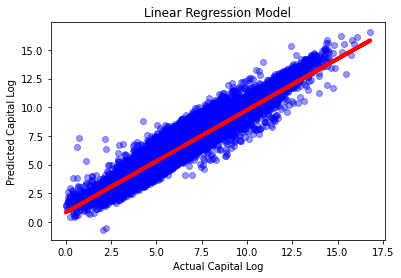

In [76]:
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.4)
yfit = [a + b * xi for xi in y_test.values]
plt.plot(y_test.values, yfit, linewidth=4, color='r')
plt.xlabel('Actual Capital Log')
plt.ylabel('Predicted Capital Log')
plt.title('Linear Regression Model')
'''The code snippets in this cell and the above cell are taken from Stackoverflow by Aziz Alto https://stackoverflow.com/questions/22239691/code-for-best-fit-straight-line-of-a-scatter-plot-in-python'''

'''The code snippets in the above two cells are taken from Stackoverflow by Aziz Alto 
https://stackoverflow.com/questions/22239691/code-for-best-fit-straight-line-of-a-scatter-plot-in-python'''

### Comparing Real & Predicted Values

In [77]:
df_linear = pd.DataFrame(y_test.values, columns=['Actual Capital_log'])
df_linear['Predicted Capital_log'] = y_pred_linear

In [78]:
df_linear

,Actual Capital_log,Predicted Capital_log
0,6.576107,7.259585
1,8.245647,7.915958
2,6.037035,5.922562
3,8.796353,8.661544
4,5.296115,6.192783
...,...,...
36850,8.062990,7.850244
36851,7.504056,6.798048
36852,10.100712,9.374336
36853,9.920084,9.857201


## Lasso Regression Model - L1 Regularization

In [80]:
#Cross Validation of Lasso Model
lasso_crossval = LassoCV(alphas = None, cv = 10, normalize = True, max_iter = 100000)
lasso_crossval.fit(X_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [81]:
# Calculate the best alpha parameter
best_alpha_value = lasso_crossval.alpha_
best_alpha_value

4.986510774272933e-06

In [82]:
lasso_model = Lasso(alpha = best_alpha_value, random_state=42)
lasso_model.fit(X_train, y_train)

Lasso(alpha=4.986510774272933e-06, random_state=42)

In [83]:
lasso_model.score(X_train, y_train)

0.8951247206400619

In [84]:
lasso_model.score(X_test, y_test)

0.8956909702117123

In [85]:
def calculate_r2(X, y, lassomodel):
    # find the r2 score of lasso model
    r2 = lassomodel.score(X, y)
    
    # number of rows in X
    rows = X.shape[0]
    
    # number of columns in X
    colum = X.shape[1]
    
    #formula for caluculation r2 value from rows and columns
    r2_value = 1 - (1 - r2) * (rows - 1) / (rows - colum - 1)
    
    return r2_value

In [86]:
print(calculate_r2(X_train, y_train, lasso_model))

0.8951161830116032


In [87]:
print(calculate_r2(X_test, y_test, lasso_model))

0.8956654910078015


### Get predictions 

In [89]:
y_hat_lasso = lasso_model.predict(X_train)
y_pred_lasso = lasso_model.predict(X_test)

In [90]:
df_lasso_train = train_df.copy()
df_lasso_test = test_df.copy()

df_lasso_train['Predicted_Capital_log'] = y_hat_lasso
df_lasso_test['Predicted_Capital_log'] = y_pred_lasso 

# Calculate Capitalization Rate
df_lasso_train['Predicted_Capitalization Rate'] = df_lasso_train['Predicted_Capital_log']/df_lasso_train['MTMExposure_log']
df_lasso_test['Predicted_Capitalization Rate'] = df_lasso_test['Predicted_Capital_log']/df_lasso_test['MTMExposure_log']

# Combine train_df & test_df 
df_lasso = pd.concat([df_lasso_train, df_lasso_test], axis=0)

# Select required columns
df_lasso_filtered = df_lasso[['Instrument','Predicted_Capital_log','Predicted_Capitalization Rate']]

# Convert logarithmic values to original 
df_lasso_filtered['Predicted_Capital_log'] = df_lasso_filtered['Predicted_Capital_log'].apply(lambda x:np.exp(x))
df_lasso_filtered['Predicted_Capitalization Rate'] = df_lasso_filtered['Predicted_Capitalization Rate'].apply(lambda x:np.exp(x))

# Rename columns 
df_lasso_filtered = df_lasso_filtered.rename(columns = {'Predicted_Capital_log':'Predicted_Capital'})

# Merge original development dataset & df_lasso_filtered on 'Instrument'
df_dev_lasso = df_train.merge(df_lasso_filtered, how='inner', on='Instrument')
df_dev_lasso.head()

,Instrument,Instrument Type,Instrument Subtype,Counterparty Alias,MTM Exposure,Book Exposure,1-Year Likelihood,Severity Used,Industry Alias,Commitment,Country of Incorporation,Maturity Date,Time to Maturity,Capital - EL Tail Risk Contribution (Capped),Capitalization Rate - EL Tail Risk Contribution,Asset Recovery Correlation,Recovery R-Squared for Simulation,Asset R-Squared for Simulation,Predicted_Capital,Predicted_Capitalization Rate
0,86540,Loan,Term Loan Amortizing,C23099,224013.330,224013.33,0.160200,0.057,IND1,224013.33,CAN,12/15/2037,16.375086,57797.73,0.258010,0.26706,0.34109,0.0976,96839.353897,2.539392
1,86099,Loan,Revolver,C43055,135000.000,135000.00,0.036900,0.817,IND1,135000.00,CAN,04/18/2022,0.714579,23359.48,0.173033,0.26706,0.34109,0.1077,11324.398946,2.203848
2,5738,Loan,Term Loan Amortizing,C11421,36190.953,36190.95,0.036900,0.019,IND2,36190.95,CAN,11/17/2031,10.297057,1558.02,0.043050,0.33000,0.34000,0.0469,829.893929,1.897113
3,165996,Loan,Term Loan Amortizing,C44251,84600.000,84600.00,0.006525,0.019,IND1,84600.00,CAN,04/03/2028,6.674880,703.86,0.008320,0.26706,0.34109,0.1077,952.585775,1.830451
4,118169,Loan,Term Loan Amortizing,C53713,37508.787,37508.78,0.020475,0.247,IND1,37508.78,CAN,01/03/2040,18.425736,3602.36,0.096041,0.33000,0.34000,0.0495,6277.131986,2.293936


In [91]:
# Save dev dataset 
df_dev_lasso.to_csv('Dev_LinearRegression_Lasso_R2_895691.csv', index=False)

## Ridge Model - L2 Regularization

In [92]:
# Train the ridge model
ridge_model = Ridge()
ridge_model.fit(X_train,y_train)

Ridge()

In [93]:
# Get predictions 
x_hat_ridge = ridge_model.predict(X_train)
y_pred_ridge = ridge_model.predict(X_test)

In [94]:
r2_score(y_test, y_pred_ridge)

0.8956909703068134

In [95]:
df_ridge_train = train_df.copy()
df_ridge_test = test_df.copy()

df_ridge_train['Predicted_Capital_log'] = x_hat_ridge
df_ridge_test['Predicted_Capital_log'] = y_pred_ridge

# Calculate Capitalization Rate
df_ridge_train['Predicted_Capitalization Rate'] = df_ridge_train['Predicted_Capital_log']/df_ridge_train['MTMExposure_log']
df_ridge_test['Predicted_Capitalization Rate'] = df_ridge_test['Predicted_Capital_log']/df_ridge_test['MTMExposure_log']

# Combine train_df & test_df 
df_ridge = pd.concat([df_ridge_train, df_ridge_test], axis=0)

# Select required columns
df_ridge_filtered = df_ridge[['Instrument','Predicted_Capital_log','Predicted_Capitalization Rate']]

# Convert logarithmic values to original 
df_ridge_filtered['Predicted_Capital_log'] = df_ridge_filtered['Predicted_Capital_log'].apply(lambda x:np.exp(x))
df_ridge_filtered['Predicted_Capitalization Rate'] = df_ridge_filtered['Predicted_Capitalization Rate'].apply(lambda x:np.exp(x))

# Rename columns 
df_ridge_filtered = df_ridge_filtered.rename(columns = {'Predicted_Capital_log':'Predicted_Capital'})

# Merge original development dataset & df_lasso_filtered on 'Instrument'
df_dev_ridge = df_train.merge(df_ridge_filtered, how='inner', on='Instrument')
df_dev_ridge.head()

,Instrument,Instrument Type,Instrument Subtype,Counterparty Alias,MTM Exposure,Book Exposure,1-Year Likelihood,Severity Used,Industry Alias,Commitment,Country of Incorporation,Maturity Date,Time to Maturity,Capital - EL Tail Risk Contribution (Capped),Capitalization Rate - EL Tail Risk Contribution,Asset Recovery Correlation,Recovery R-Squared for Simulation,Asset R-Squared for Simulation,Predicted_Capital,Predicted_Capitalization Rate
0,86540,Loan,Term Loan Amortizing,C23099,224013.330,224013.33,0.160200,0.057,IND1,224013.33,CAN,12/15/2037,16.375086,57797.73,0.258010,0.26706,0.34109,0.0976,96838.879741,2.539391
1,86099,Loan,Revolver,C43055,135000.000,135000.00,0.036900,0.817,IND1,135000.00,CAN,04/18/2022,0.714579,23359.48,0.173033,0.26706,0.34109,0.1077,11324.285063,2.203846
2,5738,Loan,Term Loan Amortizing,C11421,36190.953,36190.95,0.036900,0.019,IND2,36190.95,CAN,11/17/2031,10.297057,1558.02,0.043050,0.33000,0.34000,0.0469,829.903390,1.897115
3,165996,Loan,Term Loan Amortizing,C44251,84600.000,84600.00,0.006525,0.019,IND1,84600.00,CAN,04/03/2028,6.674880,703.86,0.008320,0.26706,0.34109,0.1077,952.590610,1.830452
4,118169,Loan,Term Loan Amortizing,C53713,37508.787,37508.78,0.020475,0.247,IND1,37508.78,CAN,01/03/2040,18.425736,3602.36,0.096041,0.33000,0.34000,0.0495,6277.165380,2.293937


In [96]:
# Save dev dataset 
df_dev_ridge.to_csv('Dev_LinearRegression_Ridge_R2_895691.csv', index=False)

## Data Summary

In [106]:
summary_data = [['Linear', 0.895691029847548], ['Lasso', 0.8956919701784126], ['Ridge', 0.8956909702735139]]
summary = pd.DataFrame(summary_data, columns=['Model Name', 'R2 Score'])
summary.index = np.arange(1, len(summary)+1)
summary

,Model Name,R2 Score
1,Linear,0.895691
2,Lasso,0.895692
3,Ridge,0.895691


###### Finding: Performance is same for all models. We can pick any one of these models for predictions on holdout dataset. We will consider Lasso for getting predictions for holdout dataset.

In [107]:
# Save best model predictions
df_dev_lasso.to_csv('Dev_LinearRegression_Lasso_BEST_R2_0.895691.csv', index=False)

# <center> Submit Answer </center>

##### Loading the Holdout Test Data

In [108]:
'''Read FCC test Data from csv file'''
df_test = pd.read_csv(r'C:\FAIZA\DATA SCIENCE\Assignment\Holdout Test - Actuals Removed.csv')
FCC_test = df_test.copy()

In [109]:
FCC_test.head()

,Instrument,Instrument Type,Instrument Subtype,Counterparty Alias,MTM Exposure,Book Exposure,1-Year Likelihood,Severity Used,Industry Alias,Commitment,Country of Incorporation,Maturity Date,Time to Maturity,Capital - EL Tail Risk Contribution (Capped),Capitalization Rate - EL Tail Risk Contribution,Asset Recovery Correlation,Recovery R-Squared for Simulation,Asset R-Squared for Simulation
0,49146,Loan,Term Loan Amortizing,C13207,89465.73891,89518.73,0.006525,0.1330,IND1,89518.73,CAN,02/16/2037,15.548255,NaN,NaN,0.33000,0.34000,0.0484
1,62941,Loan,Term Loan Amortizing,C34003,42068.35800,42068.35,0.033975,0.0095,IND1,42068.35,CAN,11/25/2026,5.319644,NaN,NaN,0.26706,0.34109,0.0549
2,87386,Loan,Term Loan Amortizing,C93,31293.97200,31293.97,0.006525,0.0190,IND1,31293.97,CAN,04/01/2024,2.669405,NaN,NaN,0.26706,0.34109,0.1077
3,148592,Loan,Term Loan Amortizing,C51685,810000.00000,810000.00,0.014400,0.6080,IND5,810000.00,CAN,01/02/2032,10.422998,NaN,NaN,0.25273,0.34550,0.0532
4,84761,Loan,Term Loan Amortizing,C49430,256009.86000,256009.86,0.062550,0.0570,IND1,256009.86,CAN,10/01/2038,17.169062,NaN,NaN,0.26706,0.34109,0.0549


In [110]:
FCC_test.tail()

,Instrument,Instrument Type,Instrument Subtype,Counterparty Alias,MTM Exposure,Book Exposure,1-Year Likelihood,Severity Used,Industry Alias,Commitment,Country of Incorporation,Maturity Date,Time to Maturity,Capital - EL Tail Risk Contribution (Capped),Capitalization Rate - EL Tail Risk Contribution,Asset Recovery Correlation,Recovery R-Squared for Simulation,Asset R-Squared for Simulation
14995,14876,Loan,Term Loan Amortizing,C29869,129144.708,129144.70,0.036900,0.019000,IND1,129144.70,CAN,01/02/2036,14.422998,NaN,NaN,0.33000,0.34000,0.0469
14996,34626,Loan,Revolver,C13687,90000.000,46287.00,0.102375,0.089775,IND1,90000.00,CAN,03/15/2022,0.621492,NaN,NaN,0.26706,0.34109,0.0860
14997,93946,Loan,Term Loan Amortizing,C28524,6046.524,6046.52,0.020700,0.009500,IND1,6046.52,CAN,09/01/2023,2.086242,NaN,NaN,0.26706,0.34109,0.0549
14998,85147,Loan,Term Loan Amortizing,C37411,156508.740,156508.74,0.020700,0.009500,IND1,156508.74,CAN,06/01/2028,6.836413,NaN,NaN,0.26706,0.34109,0.0860
14999,4846,Loan,Term Loan Amortizing,C19752,21921.381,21921.38,0.033975,0.009500,IND1,21921.38,CAN,12/01/2021,0.336756,NaN,NaN,0.26706,0.34109,0.0860


In [111]:
FCC_test.shape

(15000, 18)

###### We perform all the data preprocessing steps for test dataset same like Development Dataset

In [112]:
# Fill missing values with 'Bond'
FCC_test['Instrument Subtype'] = FCC_test['Instrument Subtype'].fillna('Bond')

FCC_test_null_filled_col_dropped = FCC_test
# Drop Counterparty Alias, Country of Incorporation, Maturity Date & Instrument columns
FCC_test_null_filled_col_dropped.drop(['Counterparty Alias','Instrument','Country of Incorporation','Maturity Date'], axis=1, inplace = True)

# Perform Transformation & Cleaning like what we did for development sets 
FCC_test_null_filled_col_dropped['MTMExposure_log']=np.log(FCC_test_null_filled_col_dropped['MTM Exposure'])
FCC_test_null_filled_col_dropped['Commitment_log']=np.log(FCC_test_null_filled_col_dropped['Commitment'])

# Drop MTM Exposure, Book Exposure, Commitment & Capital - EL Tail Risk Contribution (Capped) columns
FCC_test_null_filled_col_dropped.drop(['MTM Exposure','Book Exposure','Commitment','Capital - EL Tail Risk Contribution (Capped)'], axis=1, inplace=True)

# Encode Categorical columns
test_dummy_encoded_df = pd.get_dummies(FCC_test_null_filled_col_dropped, columns = ['Instrument Type', 'Instrument Subtype'], drop_first = True)

# Drop Instrument Subtype_Revolver, Instrument Subtype_Term Loan Amortizing, & Industry Alias columns
test_dummy_encoded_df.drop(['Instrument Subtype_Revolver','Instrument Subtype_Term Loan Amortizing','Industry Alias'], axis=1, inplace=True)

# Drop Capitalization Rate - EL Tail Risk Contribution
test_dummy_encoded_df.drop(['Capitalization Rate - EL Tail Risk Contribution'], axis=1, inplace=True)

# Transform the data into scaled values 
test_dummy_encoded_df_scaled = scaler.transform(test_dummy_encoded_df)
test_dummy_encoded_df_scaled = pd.DataFrame(test_dummy_encoded_df_scaled, columns=test_dummy_encoded_df.columns)

In [113]:
test_dummy_encoded_df_scaled.head()

,1-Year Likelihood,Severity Used,Time to Maturity,Asset Recovery Correlation,Recovery R-Squared for Simulation,Asset R-Squared for Simulation,MTMExposure_log,Commitment_log,Instrument Type_Loan
0,-1.120864,1.648411,-6.748574e-12,-1.555225,2.210523,-26.550600,8.959075,-0.013024,0.015916
1,0.006195,-0.798066,-2.207346e-08,-1.614506,2.223012,-26.072735,8.959039,-0.540403,0.015916
2,-1.120864,-0.440930,-2.131848e-06,-1.614506,2.223012,-22.009595,8.959021,-0.747396,0.015916
3,-0.746096,2.371451,-1.522356e-10,-1.628454,2.270184,-26.198183,8.959132,1.518210,0.015916
4,0.764901,0.609775,-3.076456e-12,-1.614506,2.223012,-26.072735,8.959109,0.718706,0.015916


### Evaluate Trained Models (Linear, Lasso, & Ridge) on Holdout Dataset

In [115]:
# Linear regression 
y_pred_linear = clf.predict(test_dummy_encoded_df_scaled)

# Lasso regression
y_pred_lasso = lasso_model.predict(test_dummy_encoded_df_scaled)

# Ridge regression
y_pred_ridge = ridge_model.predict(test_dummy_encoded_df_scaled)

In [116]:
# Linear regression 
df_test_linear = df_test.copy()
df_test_linear['Capital - EL Tail Risk Contribution (Capped)'] = y_pred_linear
df_test_linear['Capitalization Rate - EL Tail Risk Contribution'] = df_test_linear['Capital - EL Tail Risk Contribution (Capped)']/test_dummy_encoded_df_scaled['MTMExposure_log']
# Convert logarithmic values to original 
df_test_linear['Capital - EL Tail Risk Contribution (Capped)'] = df_test_linear['Capital - EL Tail Risk Contribution (Capped)'].apply(lambda x:np.exp(x))
df_test_linear['Capitalization Rate - EL Tail Risk Contribution'] = df_test_linear['Capitalization Rate - EL Tail Risk Contribution'].apply(lambda x:np.exp(x))

# Lasso regression 
df_test_lasso = df_test.copy()
df_test_lasso['Capital - EL Tail Risk Contribution (Capped)'] = y_pred_lasso
df_test_lasso['Capitalization Rate - EL Tail Risk Contribution'] = df_test_lasso['Capital - EL Tail Risk Contribution (Capped)']/test_dummy_encoded_df_scaled['MTMExposure_log']
# Convert logarithmic values to original 
df_test_lasso['Capital - EL Tail Risk Contribution (Capped)'] = df_test_lasso['Capital - EL Tail Risk Contribution (Capped)'].apply(lambda x:np.exp(x))
df_test_lasso['Capitalization Rate - EL Tail Risk Contribution'] = df_test_lasso['Capitalization Rate - EL Tail Risk Contribution'].apply(lambda x:np.exp(x))

# Ridge regression 
df_test_ridge = df_test.copy()
df_test_ridge['Capital - EL Tail Risk Contribution (Capped)'] = y_pred_ridge
df_test_ridge['Capitalization Rate - EL Tail Risk Contribution'] = df_test_ridge['Capital - EL Tail Risk Contribution (Capped)']/test_dummy_encoded_df_scaled['MTMExposure_log']
# Convert logarithmic values to original 
df_test_ridge['Capital - EL Tail Risk Contribution (Capped)'] = df_test_ridge['Capital - EL Tail Risk Contribution (Capped)'].apply(lambda x:np.exp(x))
df_test_ridge['Capitalization Rate - EL Tail Risk Contribution'] = df_test_ridge['Capitalization Rate - EL Tail Risk Contribution'].apply(lambda x:np.exp(x))

### Save Predictions in Holdout Dataset

In [117]:
df_test_linear.to_csv('Test_LinearRegression_R2_0.895691.csv', index=False)
df_test_lasso.to_csv('Test_LinearRegression_Lasso_R2_0.895691.csv', index=False)
df_test_ridge.to_csv('Test_LinearRegression_Ridge_R2_0.895691.csv', index=False)
df_test_lasso.to_csv('Test_LinearRegression_Lasso_BEST_R2_0.895691.csv', index=False)

## Conclusion

###### My Best R2 Score is that of Lasso Regression = 0.895691

##### My prediction is as good as it could be with linear regression. Initially, there had been many troubles with the dataset, that is because the data was not normally distributed, it was random and the correlation was also not good. I have used Linear regression, Lasso & Ridge. For a higher prediction accuracy, may be we can try to use different models, for instance, decision tree, clustering or random forests.